<a href="https://colab.research.google.com/github/shailendrajain2892/GA-Classes/blob/master/Capstone_Mahindra_First_Choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Plant data 
**remove duplicate and null columns.**

In [0]:
plant_full_data = pd.read_csv('./drive/My Drive/Colab Notebooks/data/final_csv/plant.csv', index_col=0)

In [0]:
plant_full_data.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [0]:
plant_full_data.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [0]:
plant_full_data.shape

(438, 13)

**Drop columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization']**

In [0]:
plant = plant_full_data.drop(columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization', 'Customer no. - plant'])

In [0]:
plant.shape

(438, 5)

In [0]:
plant.isnull().sum()

Plant          0
Name 1         0
Postal Code    0
City           0
State          0
dtype: int64

##Read Customer Data. 
**Remove Duplicate and Missing values columns**.

In [0]:
customer_full_data = pd.read_csv('./drive/My Drive/Colab Notebooks/data/final_csv/customer.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
customer_full_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaN
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaN
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaN
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaN
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaN


In [0]:
customer_full_data.shape

(555338, 9)

In [0]:
customer_full_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [0]:
customer = customer_full_data.drop(columns = ['Marital Status', 'Occupation', 'Date of Birth', 'Death date', 'Business Partner'])

In [0]:
customer.dtypes

Customer No.     object
Partner Type    float64
Data Origin      object
Title           float64
dtype: object

In [0]:
customer.isnull().sum()

Customer No.        0
Partner Type       78
Data Origin       136
Title           46307
dtype: int64

**FIll Missing Values in Partner Type, Data Origin, Title columns with most_frequently used values.**

In [0]:
most_frequent_value = customer['Partner Type'].mode()
customer['Partner Type'] = customer['Partner Type'].fillna(most_frequent_value[0])

In [0]:
customer['Data Origin'] = customer['Data Origin'].fillna(customer['Data Origin'].mode()[0])

In [0]:
customer['Title'] = customer['Title'].fillna(customer['Title'].mode()[0])

In [0]:
customer.isnull().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

##Load Vehicle Data. 
**Treat missing and nan values.**

In [0]:
vehicles_full_data = pd.read_csv('./drive/My Drive/Colab Notebooks/data/final_csv/vehicles.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
vehicles_full_data.head()

,Vehicle Model,Product GUID,License Plate Number,Fuel Type
0,Z_MAHINDRA,000C2937F0991ED493A0CC3579ED97ED,MH12HN2835,2
1,Z_TATA,000C2937F0991ED493A19620CB69DDA0,TN10AL3462,2
2,Z_MARUTI,000C2937F0991ED493A28DAFBFBA870E,AP28DG9695,1
3,Z_HONDA,000C2937F0991ED493A496B779A143D3,MH15DS9580,1
4,Z_MARUTI,000C2937F0991ED493A58273B92EC2F8,MH14CK0669,2


In [0]:
vehicles_full_data.shape

(588761, 4)

In [0]:
vehicles_full_data.isnull().sum()

Vehicle Model               0
Product GUID                0
License Plate Number     2058
Fuel Type               15627
dtype: int64

***`Remove Product GUID column`***

In [0]:
vehicles = vehicles_full_data.drop(columns='Product GUID')

In [0]:
vehicles.shape

(588761, 3)

In [0]:
vehicles.isnull().sum()

Vehicle Model               0
License Plate Number     2058
Fuel Type               15627
dtype: int64

In [0]:
vehicles.dtypes

Vehicle Model           object
License Plate Number    object
Fuel Type               object
dtype: object

***`Remove vehicles which doesn't have License Plate Number`***

In [0]:
vehicles.dropna(subset=['License Plate Number'], inplace=True)

In [0]:
vehicles.shape

(586703, 3)

In [0]:
vehicles['Fuel Type'] = vehicles['Fuel Type'].fillna(vehicles['Fuel Type'].mode()[0])

In [0]:
vehicles.isnull().sum()

Vehicle Model           0
License Plate Number    0
Fuel Type               0
dtype: int64

## Load Invoice Data
Handle missing, duplicate data

In [0]:
invoice_full_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/final_csv/invoice.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
invoice_full_data.head()

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.0,SANTRO,7.000000e+09,0.00,Running Repairs,0.0,0.00,422000,BC03,NASHIK,NaN,NO,0.0,MH15BN2714,0.0,0.0,0.0,0.0,NaN,0.0,NaN,420.09,0.0,0.0,0.0,0.0,420.09,GOLIVE
1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,0000000017,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000014,17:26:52,105,2012-04-02,16:13:11,98474,179.75,MAHINDRA & MAHINDRA,0.0,LOGAN P,7.000000e+09,0.00,Running Repairs,0.0,0.00,401107,BC01,THANE,NaN,NO,0.0,MH04DN6210,0.0,0.0,0.0,0.0,NaN,0.0,NaN,179.75,0.0,0.0,0.0,0.0,179.75,GOLIVE
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Hyderabad,NaN,NaN,Retail,0000000007,Andhra Pradesh,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000016,17:44:03,6,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,7.000000e+09,0.00,Paid Service,0.0,0.00,500038,BC04,BALANAGAR,NaN,NO,0.0,AP11AB0153,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1340.37,0.0,0.0,0.0,0.0,1340.37,GOLIVE
3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Hyderabad,NaN,NaN,Retail,E22364,Andhra Pradesh,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000026,20:04:51,24,2012-04-01,16:19:32,75627,1709.06,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,7.000000e+09,480.02,Paid Service,0.0,3317.37,500023,BC04,BALANAGAR,NaN,NO,0.0,AP9BJ4847,0.0,0.0,0.0,0.0,NaN,0.0,4302339,5506.45,0.0,0.0,0.0,0.0,5506.45,GOLIVE
4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Hyderabad,NaN,NaN,Retail,E25218,Andhra Pradesh,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000027,20:24:21,23,2012-04-01,16:19:32,1,2074.88,TATA MOTORS,0.0,INDICA,7.000000e+09,0.00,Accidental,0.0,3105.67,500045,BC04,BALANAGAR,NaN,NO,0.0,AP29BB4586,0.0,0.0,0.0,0.0,NaN,0.0,4302337,5180.55,0.0,0.0,0.0,0.0,5180.55,GOLIVE


In [0]:
invoice_full_data.shape

(984741, 58)

In [0]:
columns_to_be_removed = invoice_full_data.isnull().sum()[invoice_full_data.isnull().sum().sort_values() > 29178].index

In [0]:
invoice = invoice_full_data.drop(columns=columns_to_be_removed)

In [0]:
invoice.shape

(984741, 28)

In [0]:
invoice.head(5)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,NaN,Nashik,Retail,E14006,Maharashtra,00:00:00,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.0,SANTRO,0.00,Running Repairs,0.00,422000,BC03,NASHIK,NO,0.0,MH15BN2714,420.09,GOLIVE
1,NaN,THANE,Retail,0000000017,Maharashtra,00:00:00,2012-04-02,7000000014,17:26:52,105,2012-04-02,16:13:11,98474,179.75,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,Running Repairs,0.00,401107,BC01,THANE,NO,0.0,MH04DN6210,179.75,GOLIVE
2,NaN,Hyderabad,Retail,0000000007,Andhra Pradesh,00:00:00,2012-04-02,7000000016,17:44:03,6,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.0,AP11AB0153,1340.37,GOLIVE
3,NaN,Hyderabad,Retail,E22364,Andhra Pradesh,00:00:00,2012-04-02,7000000026,20:04:51,24,2012-04-01,16:19:32,75627,1709.06,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,480.02,Paid Service,3317.37,500023,BC04,BALANAGAR,NO,0.0,AP9BJ4847,5506.45,GOLIVE
4,NaN,Hyderabad,Retail,E25218,Andhra Pradesh,00:00:00,2012-04-02,7000000027,20:24:21,23,2012-04-01,16:19:32,1,2074.88,TATA MOTORS,0.0,INDICA,0.00,Accidental,3105.67,500045,BC04,BALANAGAR,NO,0.0,AP29BB4586,5180.55,GOLIVE


In [0]:
columns_irrelevant = ['Area / Locality', 'Print Status', 'Gate Pass Time', 'Recovrbl Exp']

In [0]:
invoice = invoice.drop(columns=columns_irrelevant)

In [0]:
invoice.dropna(subset=['Regn No'], inplace=True)

In [0]:
invoice.isnull().sum().sort_values()

Labour Total             0
Regn No                  0
Plant Name1              0
Plant                    0
Pin code                 0
Parts Total              0
Order Type               0
OSL Total                0
Misc Total               0
Make                     0
Total Amt Wtd Tax.       0
User ID                  0
JobCard Time             0
JobCard Date             0
Job Card No              0
Invoice Time             0
Invoice No               0
Invoice Date             0
District                 0
Customer No.             0
KMs Reading              0
Cust Type                4
CITY                     4
Model                 1524
dtype: int64

In [0]:
invoice['Cust Type'] = invoice['Cust Type'].fillna(invoice['Cust Type'].mode()[0])
invoice['CITY'] = invoice['CITY'].fillna(invoice['CITY'].mode()[0])
invoice['Model']  = invoice['Model'].fillna(invoice['Model'].mode()[0])

In [0]:
invoice.isnull().sum().sort_values()

CITY                  0
Regn No               0
Plant Name1           0
Plant                 0
Pin code              0
Parts Total           0
Order Type            0
OSL Total             0
Model                 0
Misc Total            0
Make                  0
Labour Total          0
KMs Reading           0
JobCard Time          0
JobCard Date          0
Job Card No           0
Invoice Time          0
Invoice No            0
Invoice Date          0
District              0
Customer No.          0
Cust Type             0
Total Amt Wtd Tax.    0
User ID               0
dtype: int64

## Read JTD data
* Handle missing and duplicate data.

In [0]:
jtd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/final_csv/jtd.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [150]:
jtd.head()

,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,98050,10,1EMJ96615412,NaN,SWITCH A-A/C CONTROL,P002,1.0,EA,5185.92
1,98050,20,1EMJ96548238,NaN,WEATHER STRIP A-REAR DOOR LH,P002,1.0,EA,1433.49
2,98050,30,1EMJ96548102,NaN,WEATHER STRIP A-FRONT DOOR LH,P002,1.0,EA,1526.88
3,98050,40,1EMJ96548239,NaN,WEATHER STRIP A-REAR DOOR RH,P002,1.0,EA,1433.49
4,98050,50,1EMJ96548103,NaN,WEATHER STRIP A-FRONT DOOR RH,P002,1.0,EA,1526.88


In [152]:
jtd['Description'].value_counts()

MISC_OTHER CHARGES                          270563
Paid Service-Minor                          201857
WASHING                                     199068
Wheel Alignment                             191211
OIL FILTER                                  154387
URANIA SUPREMO CI 4 15W 40                  122218
MFC PROLEUM CI4/SL 15W40                     92091
AIR FILTER                                   80211
Wheel Balancing (5 Wheels)                   79970
MISC LABOR 0.5 HOURS                         62982
General Check up                             62459
Paid Service-Major                           60369
WINDSHIELD LIQUID WASHER                     55352
MISC LABOR 0.25 HOURS                        50143
DISTILLED WATER                              46919
Interior & Upholstery Cleaning               44864
REPLACE BRAKE PAD (BOTH SIDE)                38552
PAINTING CHARGES                             34187
MISC LABOR 1 HOUR                            33993
BALANCE WEIGHT 15GRAM          

In [0]:
jtd[jtd['Material']=='MARUTISUZUKI_SRV']

,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
71,341232,80,MARUTISUZUKI_SRV,MSALPS0004,WASHING,P001,84.0,MIN,0.01
180,371391,10,MARUTISUZUKI_SRV,MSSWPS0004,WASHING,P001,84.0,MIN,0.01
284,381137,30,MARUTISUZUKI_SRV,MSZESP0003,OVERHAUL FRONT SUSPENSION,P001,144.0,MIN,647.97
313,386061,10,MARUTISUZUKI_SRV,MSSWPS0006,MISC LABOR 0.25 HOURS,P001,15.0,MIN,33.90
326,387424,90,MARUTISUZUKI_SRV,MSSWEL0040,REMOVE & REFIT WINDSHIELD TANK MOTOR,P001,36.0,MIN,162.01
327,387424,100,MARUTISUZUKI_SRV,MSSWEL0075,REPLACE PARKING BRAKE SWITCH,P001,24.0,MIN,108.01
336,390912,10,MARUTISUZUKI_SRV,MSZNPS0004,WASHING,P001,84.0,MIN,0.00
355,395188,10,MARUTISUZUKI_SRV,MSSDSP0003,OVERHAUL FRONT SUSPENSION,P001,156.0,MIN,702.00
356,395188,20,MARUTISUZUKI_SRV,MSSDSP0004,REPLACE RR STABLIZER (ONE),P001,42.0,MIN,189.00
357,395188,30,MARUTISUZUKI_SRV,MSSDSP0007,REPLACE RR STRUT ASSY (ONE),P001,66.0,MIN,297.00


In [0]:
jtd.shape

(5619484, 9)

In [0]:
jtd.isnull().sum().sort_values()

DBM Order                    0
Order Item                   0
Item Category                0
Order Quantity               0
Net value                    0
Material                 51629
Description              51629
Target quantity UoM      51629
Labor Value Number     3774033
dtype: int64

## Merge the Data
**Merge Invoice and Customer Data on Customer No. Key**

In [0]:
invoice['Customer No.'] = invoice['Customer No.'].str.lstrip('0')

In [0]:
customer['Customer No.'] = customer['Customer No.'].astype(str)

In [0]:
invoice_customer = pd.merge(invoice, customer, on='Customer No.')

In [0]:
invoice_customer.shape, len(invoice['Customer No.'].unique()), len(customer['Customer No.'].unique()), len(invoice_customer['Customer No.'].unique())

((981217, 27), 502770, 555338, 502480)

In [0]:
invoice_customer.isnull().sum()

CITY                  0
Cust Type             0
Customer No.          0
District              0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Regn No               0
Total Amt Wtd Tax.    0
User ID               0
Partner Type          0
Data Origin           0
Title                 0
dtype: int64

**Merge Vehicle and Invoice Customer df based on Registration number and License plat number**

In [0]:
invoice_customer.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title
0,Nashik,Retail,E14006,Maharashtra,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.0,SANTRO,0.0,Running Repairs,0.00,422000,BC03,NASHIK,MH15BN2714,420.09,GOLIVE,1.0,Z001,2.0
1,Nashik,Retail,E14006,Maharashtra,2012-12-05,7000016665,17:53:56,16545,2012-12-05,10:45:16,89165,779.09,HYUNDAI,0.0,SANTRO,0.0,Paid Service,858.34,422000,BC03,NASHIK,MH15BN2714,1637.43,BC03SA3,1.0,Z001,2.0
2,Nashik,Retail,E14006,Maharashtra,2017-04-14,7164601412,15:29:52,674656,2017-04-13,17:09:17,35165,579.13,HONDA,0.0,CITY,0.0,Paid Service,40.54,422000,X073,X073- KRITI AUTOMOBILE REPAIR,MH15EB5067,619.67,X073SA1,1.0,Z001,2.0
3,Nashik,Retail,E14006,Maharashtra,2017-07-26,7164602068,12:07:36,809011,2017-07-26,11:01:16,36165,3.46,HONDA,0.0,CITY,0.0,Running Repairs,0.00,422000,X073,X073- KRITI AUTOMOBILE REPAIR,MH15EB5067,3.46,X073SA1,1.0,Z001,2.0
4,Nashik,Retail,E14006,Maharashtra,2014-05-13,7000113010,10:18:16,113877,2014-05-12,10:09:53,104111,1539.84,HYUNDAI,0.0,SANTRO,0.0,Paid Service,1685.14,422000,BC03,NASHIK,MH15BN2714,3224.98,BC03SA2,1.0,Z001,2.0


In [0]:
invoice_customer['Regn No'] = invoice_customer['Regn No'].astype(str)

In [0]:
vehicles['License Plate Number'] = vehicles['License Plate Number'].astype(str)

In [0]:
vehicles['License Plate Number'].unique()

array(['MH12HN2835', 'TN10AL3462', 'AP28DG9695', ..., 'KA09Z6087',
       'TN30K7112', 'KA09MB290'], dtype=object)

In [0]:
invoice_customer.shape

(981217, 27)

In [0]:
invoice_customer_vehicles = pd.merge(invoice_customer, vehicles, left_on='Regn No', right_on='License Plate Number')

In [0]:
invoice_customer_vehicles.drop(columns='Regn No', inplace=True)

In [0]:
vehicles.isnull().sum()

Vehicle Model           0
License Plate Number    0
Fuel Type               0
dtype: int64

In [0]:
invoice_customer_vehicles.isnull().sum()

CITY                    0
Cust Type               0
Customer No.            0
District                0
Invoice Date            0
Invoice No              0
Invoice Time            0
Job Card No             0
JobCard Date            0
JobCard Time            0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
Model                   0
OSL Total               0
Order Type              0
Parts Total             0
Pin code                0
Plant                   0
Plant Name1             0
Total Amt Wtd Tax.      0
User ID                 0
Partner Type            0
Data Origin             0
Title                   0
Vehicle Model           0
License Plate Number    0
Fuel Type               0
dtype: int64

In [0]:
invoice_customer_vehicles.shape

(984165, 29)

**Merge invoice_customer_vehicles and Plant**

In [0]:
plant.shape

(438, 5)

In [0]:
len(invoice_customer_vehicles.Plant.unique()), len(plant.Plant.unique())

(431, 438)

In [0]:
invoice_customer_vehicles_plant = pd.merge(invoice_customer_vehicles, plant, on='Plant')

In [0]:
invoice_customer_vehicles_plant.shape

(743801, 33)

In [0]:
invoice_customer_vehicles_plant.isnull().sum()

CITY                    0
Cust Type               0
Customer No.            0
District                0
Invoice Date            0
Invoice No              0
Invoice Time            0
Job Card No             0
JobCard Date            0
JobCard Time            0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
Model                   0
OSL Total               0
Order Type              0
Parts Total             0
Pin code                0
Plant                   0
Plant Name1             0
Total Amt Wtd Tax.      0
User ID                 0
Partner Type            0
Data Origin             0
Title                   0
Vehicle Model           0
License Plate Number    0
Fuel Type               0
Name 1                  0
Postal Code             0
City                    0
State                   0
dtype: int64

## Prepare Data for Clustering after cleaning merged data

In [0]:
invoice_customer_vehicles_plant.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title,Vehicle Model,License Plate Number,Fuel Type,Name 1,Postal Code,City,State
0,Nashik,Retail,E14006,Maharashtra,2017-04-14,7164601412,15:29:52,674656,2017-04-13,17:09:17,35165,579.13,HONDA,0.0,CITY,0.0,Paid Service,40.54,422000,X073,X073- KRITI AUTOMOBILE REPAIR,619.67,X073SA1,1.0,Z001,2.0,Z_HONDA,MH15EB5067,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
1,Nashik,Retail,E14006,Maharashtra,2017-07-26,7164602068,12:07:36,809011,2017-07-26,11:01:16,36165,3.46,HONDA,0.0,CITY,0.0,Running Repairs,0.00,422000,X073,X073- KRITI AUTOMOBILE REPAIR,3.46,X073SA1,1.0,Z001,2.0,Z_HONDA,MH15EB5067,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
2,Nashik,Retail,E27136,Maharashtra,2017-08-16,7164602334,18:49:05,836012,2017-08-16,16:16:12,89944,3.46,MARUTI SUZUKI,0.0,WAGONR,0.0,Paid Service,0.00,422009,X073,X073- KRITI AUTOMOBILE REPAIR,3.46,X073SA1,1.0,Z001,2.0,Z_MARUTI,MH04BK0425,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
3,Pune,Retail,E26786,Maharashtra,2017-03-18,7164601170,14:46:31,626932,2017-03-04,11:41:33,30796,150.48,MARUTI SUZUKI,0.0,WAGONR,0.0,Running Repairs,0.00,411056,X073,X073- KRITI AUTOMOBILE REPAIR,150.48,X073SA1,1.0,Z001,2.0,Z_MARUTI,MH15EB6209,1,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
4,NASIK,Retail,131,Maharashtra,2016-12-31,7164600695,11:55:07,554552,2016-12-28,16:50:13,177260,1519.08,MARUTI SUZUKI,0.0,ALTO,0.0,Paid Service,889.92,422000,X073,X073- KRITI AUTOMOBILE REPAIR,2409.00,X073SA1,1.0,Z005,2.0,Z_MARUTI,MH15BD6287,1,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra


In [0]:
invoice_customer_vehicles_plant[invoice_customer_vehicles_plant['Customer No.'] == 'E14006']

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title,Vehicle Model,License Plate Number,Fuel Type,Name 1,Postal Code,City,State
0,Nashik,Retail,E14006,Maharashtra,2017-04-14,7164601412,15:29:52,674656,2017-04-13,17:09:17,35165,579.13,HONDA,0.0,CITY,0.0,Paid Service,40.54,422000,X073,X073- KRITI AUTOMOBILE REPAIR,619.67,X073SA1,1.0,Z001,2.0,Z_HONDA,MH15EB5067,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
1,Nashik,Retail,E14006,Maharashtra,2017-07-26,7164602068,12:07:36,809011,2017-07-26,11:01:16,36165,3.46,HONDA,0.0,CITY,0.0,Running Repairs,0.00,422000,X073,X073- KRITI AUTOMOBILE REPAIR,3.46,X073SA1,1.0,Z001,2.0,Z_HONDA,MH15EB5067,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra


In [0]:
invoice_customer_vehicles_plant.shape

(743801, 33)

In [0]:
invoice_customer_vehicles_plant.describe()

,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Total Amt Wtd Tax.,Partner Type,Title,Postal Code
count,7.438010e+05,7.438010e+05,7.438010e+05,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000
mean,7.183450e+09,6.098939e+05,8.416413e+04,1530.608330,291.219836,76.105915,2218.535148,471388.503781,4116.469230,1.231200,1.952764,478618.281046
std,4.735438e+07,2.304533e+05,1.430325e+05,4828.993265,2435.280185,1055.780333,7810.100921,187263.159601,11360.422771,45.491633,0.212143,179724.614738
min,7.000000e+09,1.190000e+02,1.000000e+00,-164.950000,-0.060000,0.000000,-2343.200000,0.000000,-2342.200000,1.000000,1.000000,121006.000000
25%,7.159801e+09,4.254400e+05,3.606100e+04,0.010000,0.000000,0.000000,0.000000,333026.000000,221.560000,1.000000,2.000000,342001.000000
50%,7.179401e+09,6.160930e+05,6.439100e+04,349.960000,0.000000,0.000000,148.390000,485001.000000,1105.200000,1.000000,2.000000,500050.000000
75%,7.214001e+09,8.056700e+05,1.005160e+05,1244.250000,0.000000,0.000000,1981.000000,608001.000000,3925.150000,1.000000,2.000000,608001.000000
max,7.309000e+09,1.001292e+06,9.999999e+06,434000.000000,355200.060000,99974.800000,640296.060000,999999.000000,720296.070000,9003.000000,2.000000,999999.000000


In [0]:
invoice_customer_vehicles_plant.shape, invoice_customer_vehicles_plant.columns

((743801, 33),
 Index(['CITY', 'Cust Type', 'Customer No.', 'District', 'Invoice Date',
        'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
        'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
        'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
        'Plant Name1', 'Total Amt Wtd Tax.', 'User ID', 'Partner Type',
        'Data Origin', 'Title', 'Vehicle Model', 'License Plate Number',
        'Fuel Type', 'Name 1', 'Postal Code', 'City', 'State'],
       dtype='object'))

In [0]:
invoice_customer_vehicles_plant.head(1)

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title,Vehicle Model,License Plate Number,Fuel Type,Name 1,Postal Code,City,State
0,Nashik,Retail,E14006,Maharashtra,2017-04-14,7164601412,15:29:52,674656,2017-04-13,17:09:17,35165,579.13,HONDA,0.0,CITY,0.0,Paid Service,40.54,422000,X073,X073- KRITI AUTOMOBILE REPAIR,619.67,X073SA1,1.0,Z001,2.0,Z_HONDA,MH15EB5067,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra


In [0]:
columns_to_be_dropped_for_cluster = ['Name 1', 'CITY', 'District', 'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No', 'Make', 'Model', 'OSL Total', 'Pin code', 'Plant Name1', 'User ID', 'License Plate Number', 'Misc Total', 'Postal Code', 'JobCard Time']

In [0]:
cluster_data = invoice_customer_vehicles_plant.drop(columns=columns_to_be_dropped_for_cluster)

In [0]:
cluster_data.shape

(743801, 16)

In [0]:
cluster_data.head(1)

,Cust Type,Customer No.,JobCard Date,KMs Reading,Labour Total,Order Type,Parts Total,Plant,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,State
0,Retail,E14006,2017-04-13,35165,579.13,Paid Service,40.54,X073,619.67,1.0,Z001,2.0,Z_HONDA,2,Nashik,Maharashtra


In [0]:
cluster_data.tail(1)

,Cust Type,Customer No.,JobCard Date,KMs Reading,Labour Total,Order Type,Parts Total,Plant,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,State
743800,Retail,503898,2017-11-30,63154,0.0,Running Repairs,0.0,X720,0.0,1.0,Z006,2.0,Z_TOYOTA,2,Lucknow,Uttar Pradesh


In [0]:
cluster_data['JobCard Date'] = pd.to_datetime(cluster_data['JobCard Date'])

In [0]:
cluster_data['JobCard Month'] = cluster_data['JobCard Date'].dt.month

In [0]:
cluster_data.drop(columns=['JobCard Date'], inplace=True)

In [0]:
cluster_data.tail(1)

,Cust Type,Customer No.,KMs Reading,Labour Total,Order Type,Parts Total,Plant,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,State,JobCard Month
743800,Retail,503898,63154,0.0,Running Repairs,0.0,X720,0.0,1.0,Z006,2.0,Z_TOYOTA,2,Lucknow,Uttar Pradesh,11


In [0]:
cluster_data.shape

(743801, 16)

In [0]:
cluster_data.groupby(by='Customer No.').first()

,Cust Type,KMs Reading,Labour Total,Order Type,Parts Total,Plant,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,State,JobCard Month
Customer No.,,,,,,,,,,,,,,,
100001,Retail,80841,571.76,Running Repairs,486.68,X027,1058.44,1.0,Z005,2.0,Z_SKODA,1,Pune,Maharashtra,4
100003,Retail,104000,0.00,Accidental,0.00,X018,0.00,1.0,Z005,2.0,Z_TOYOTA,2,Shirur,Maharashtra,4
100004,Retail,2494,249.22,Running Repairs,0.00,X016,249.22,1.0,Z005,2.0,Z_HYUNDAI,2,Boripardhi,Maharashtra,4
100006,Retail,6000,1223.71,Paid Service,0.00,X072,1223.71,1.0,Z006,1.0,Z_MARUTI,1,Abohar,Punjab,4
100007,Retail,25207,1020.01,Paid Service,1407.07,X023,2427.08,1.0,Z005,2.0,Z_HYUNDAI,2,Tirupur,Tamil Nadu,3
100009,Retail,74130,0.00,Paid Service,3044.43,X029,3952.36,1.0,Z006,2.0,Z_MARUTI,1,Zirakpur,Punjab,4
10001,Retail,43285,4902.41,Paid Service,8024.01,X508,12926.42,1.0,Z001,2.0,Z_MAHINDRA,2,Thane(W),Maharashtra,4
100011,Retail,123132,87.97,Paid Service,499.39,X218,587.36,1.0,Z005,2.0,Z_MAHINDRA,2,Nashik,Maharashtra,1
100014,Retail,27668,199.40,Running Repairs,0.00,X006,199.40,1.0,Z012,2.0,Z_HYUNDAI,1,Thane,Maharashtra,4


In [0]:
cluster_data.groupby(by='Customer No.').get_group('100004')

,Cust Type,Customer No.,KMs Reading,Labour Total,Order Type,Parts Total,Plant,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,State,JobCard Month
343573,Retail,100004,2494,249.22,Running Repairs,0.00,X016,249.22,1.0,Z005,2.0,Z_HYUNDAI,2,Boripardhi,Maharashtra,4
343574,Retail,100004,59666,1283.29,Paid Service,4179.93,X016,5463.22,1.0,Z005,2.0,Z_HYUNDAI,2,Boripardhi,Maharashtra,3


In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
cluster_data['Order Type'].value_counts()

Running Repairs      427316
Paid Service         228718
Accidental            61908
Mechanical            12890
SMC Redemption         6303
SMC Value Package      5726
Repeat Order            687
WBW Order               252
Workshop Damage           1
Name: Order Type, dtype: int64

In [0]:
pd.get_dummies(cluster_data['Order Type']).shape

(743801, 9)

**Apply Label Encoding on cluster data**

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
cluster_data_categroical = cluster_data[['Cust Type', 'Order Type', 'Plant', 'Data Origin', 'Vehicle Model', 'City', 'State']]

In [0]:
cluster_data_encoded = cluster_data_categroical.apply(le.fit_transform)

In [0]:
cluster_data_numerical = cluster_data[['KMs Reading', 'Labour Total', 'Parts Total', 'Total Amt Wtd Tax.', 'Partner Type', 'Title', 'Fuel Type', 'JobCard Month']]

In [0]:
cluster_data_transformed = pd.concat([cluster_data_encoded,cluster_data_numerical], axis=1)

In [0]:
cluster_data_transformed.tail()

,Cust Type,Order Type,Plant,Data Origin,Vehicle Model,City,State,KMs Reading,Labour Total,Parts Total,Total Amt Wtd Tax.,Partner Type,Title,Fuel Type,JobCard Month
743796,6,4,395,18,11,173,22,32006,0.00,0.0,0.00,1.0,2.0,1,11
743797,6,4,395,18,12,173,22,127146,0.00,0.0,0.00,1.0,2.0,1,11
743798,6,4,395,12,16,173,22,75653,0.00,0.0,0.00,1.0,2.0,2,11
743799,6,4,395,12,9,173,22,109852,149.18,0.0,149.18,1.0,2.0,2,11
743800,6,4,395,5,25,173,22,63154,0.00,0.0,0.00,1.0,2.0,2,11


In [0]:
cluster_data_transformed.shape

(743801, 15)

## Apply Clustering Algorthims

In [0]:
from sklearn.cluster import KMeans

In [0]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(cluster_data_transformed)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

In [0]:
import matplotlib.pyplot as plt

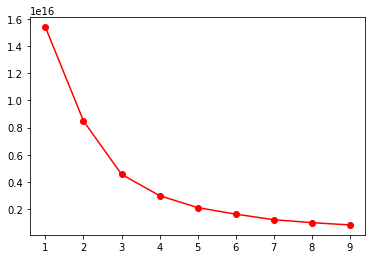

In [0]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()

In [0]:
cluster  = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# create 'cluster' column
cluster_data_transformed['cluster'] = cluster.fit_predict(cluster_data_transformed)

In [0]:
cluster_data_transformed.tail()

,Cust Type,Order Type,Plant,Data Origin,Vehicle Model,City,State,KMs Reading,Labour Total,Parts Total,Total Amt Wtd Tax.,Partner Type,Title,Fuel Type,JobCard Month,cluster
743796,6,4,395,18,11,173,22,32006,0.00,0.0,0.00,1.0,2.0,1,11,0
743797,6,4,395,18,12,173,22,127146,0.00,0.0,0.00,1.0,2.0,1,11,4
743798,6,4,395,12,16,173,22,75653,0.00,0.0,0.00,1.0,2.0,2,11,0
743799,6,4,395,12,9,173,22,109852,149.18,0.0,149.18,1.0,2.0,2,11,4
743800,6,4,395,5,25,173,22,63154,0.00,0.0,0.00,1.0,2.0,2,11,0


In [0]:
# Cluster centers
centroids = cluster.cluster_centers_

In [0]:
# Within cluster sum of squares
wcss = km.inertia_

In [0]:
centroids

array([[5.99693393e+00, 3.01337702e+00, 1.38544484e+02, 6.47123580e+00,
        1.24881836e+01, 1.61836673e+02, 1.53050549e+01, 5.27379568e+04,
        1.44725125e+03, 2.03339014e+03, 3.82679915e+03, 1.28000613e+00,
        1.95148033e+00, 1.64520763e+00, 6.97991897e+00],
       [6.00000000e+00, 2.97240473e+00, 1.67831800e+02, 5.13929041e+00,
        1.49842313e+01, 1.94989488e+02, 1.45624179e+01, 2.14672601e+06,
        1.87272683e+03, 2.37774989e+03, 4.45007714e+03, 1.00131406e+00,
        1.96320631e+00, 1.80814717e+00, 7.23390276e+00],
       [5.99869763e+00, 3.04319514e+00, 1.53955937e+02, 5.81571522e+00,
        1.34030823e+01, 1.78200998e+02, 1.44304320e+01, 8.34071885e+05,
        1.52143074e+03, 1.95649297e+03, 3.77078977e+03, 1.00043412e+00,
        1.96201433e+00, 1.71044063e+00, 7.09919687e+00],
       [6.00000000e+00, 2.97163121e+00, 1.86255319e+02, 4.83687943e+00,
        1.24397163e+01, 1.79411348e+02, 1.50000000e+01, 6.54651238e+06,
        2.18176603e+03, 2.40773184e+0

In [0]:
wcss

850269059345752.8

In [0]:
cluster_data_transformed['cluster'].value_counts()

0    580429
4    157862
2      4608
1       761
3       141
Name: cluster, dtype: int64